# Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from sklearn.datasets import load_boston

In [2]:
boston_dataset = load_boston()

/home/gabry/Dataspell/PolynomialRegression/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

## Create a Pandas Dataframe for the Boston dataset

In [3]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df['MEDV'] = boston_dataset.target

## Plot the Pearson correlation matrix

In [4]:
import seaborn as sb

<AxesSubplot:>

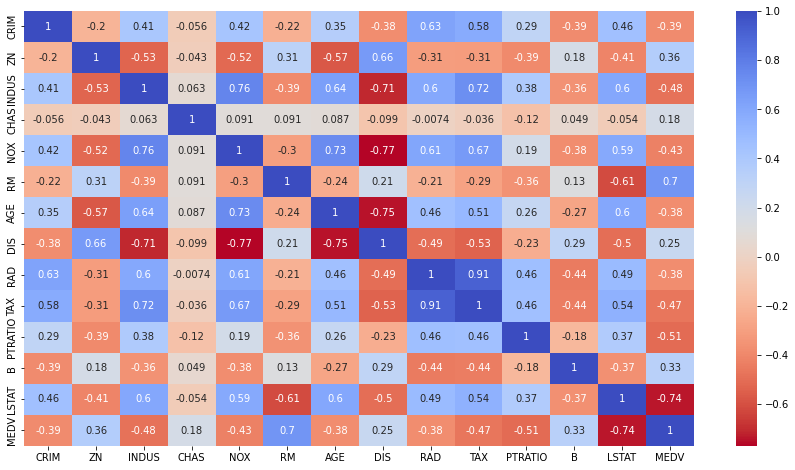

In [5]:
f, (ax1) = plt.subplots(1,1,figsize=(15,8))
corr_matrix = boston_df.corr(method='pearson')
sb.heatmap(corr_matrix,cmap='coolwarm_r', annot=True, ax = ax1)

RM and LSTAT show an high moderate correlation in our target
## Scatter Plot (RM and LSTAT)

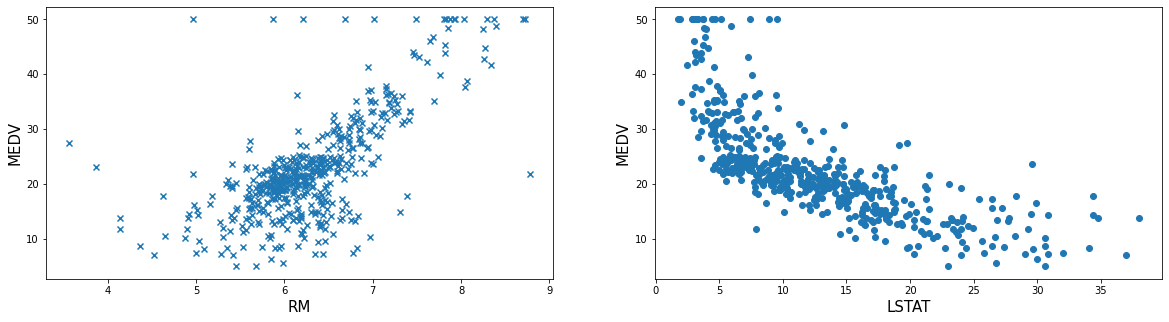

In [6]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(121)
ax1.scatter(boston_df.RM, boston_df.MEDV, marker = 'x')
ax1.set_xlabel("RM", fontsize=15)
ax1.set_ylabel("MEDV", fontsize=15)

ax2 = fig.add_subplot(122)
ax2.scatter(boston_df.LSTAT, boston_df.MEDV, marker = 'o')
ax2.set_xlabel("LSTAT",fontsize=15)
ax2.set_ylabel("MEDV", fontsize=15)
plt.show()